# BIG DATA JOBS

## DATA ANALYSIS MADE WITH PYTHON

## LOAD DATASET

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, sqlite3
import pandas as pd


In [2]:
# Provide the file path of your CSV file
csv_file = "data_science_job.csv"

# Load the CSV file into a DataFrame with specified encoding
df = pd.read_csv(csv_file, encoding='latin-1')



In [3]:
df.head()

,company,job_title,location,job_type,experience_level,salary,requirements,facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


## CLEAN DATA

In [4]:
df = df.drop('facilities', axis=1)

In [5]:
df = df.drop('company', axis=1)

## QUICK LOOK

In [6]:
df.describe()

,job_title,location,job_type,experience_level,salary,requirements
count,3197,3197,3197,2962,3009,3198
unique,2105,1070,3,4,166,2600
top,Data Engineer,United States,Full Time,Senior-level,115K,"Big Data,Business Intelligence,Data analysis,E..."
freq,184,370,3116,1876,260,12


## 1. TOP 10 JOBS

In [7]:
top_10 = df['job_title'].value_counts().head(10)
top_10

job_title
Data Engineer                    184
Data Analyst                     132
Data Scientist                    88
Machine Learning Engineer         68
Senior Data Scientist             37
Analytics Engineer                17
Data Architect                    12
Senior Analytics Engineer         11
Business Intelligence Analyst     10
Data Analyst Intern               10
Name: count, dtype: int64

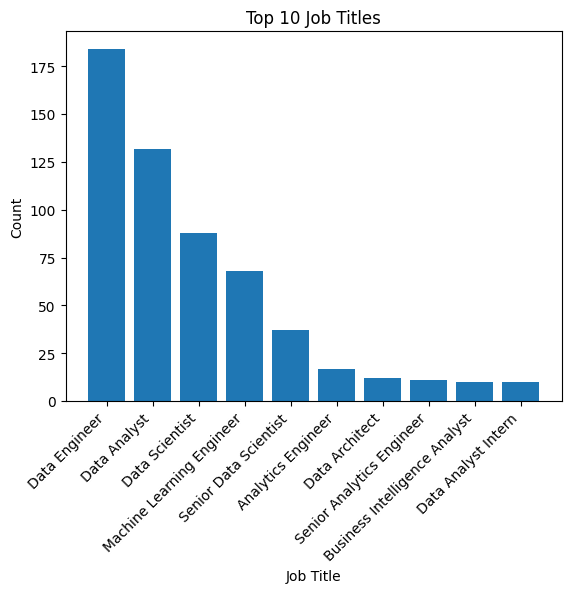

In [8]:
top_10 = df['job_title'].value_counts().head(10)

# Create a bar chart
plt.bar(top_10.index, top_10.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 2. TOP 10 COUNTRIES

In [9]:
top_loca = df['location'].value_counts().head(10)
top_loca

location
United States                 370
United Kingdom                135
India                         114
Paris, France                  79
Remote                         67
Spain                          38
Berlin, Germany                37
Bangkok                        28
Johannesburg, South Africa     15
Heredia, Costa Rica            13
Name: count, dtype: int64

## 3. TOP REQUIREMENTS

In [10]:
df.columns

Index(['job_title', 'location', 'job_type', 'experience_level', 'salary',
       'requirements'],
      dtype='object')

In [11]:
# Combine all elements in the 'requirements' column into a single string
combined_requirements = ','.join(df['requirements'])

# Split the combined string on commas to extract individual elements
all_elements = combined_requirements.split(',')

# Use value_counts() to count the frequency of each unique element
top_elements = pd.Series(all_elements).value_counts().head(30)

top_elements

# Split the 'requirements' column on commas to extract individual elements
#all_elements = df['requirements'].str.split(',')

# Flatten the list of elements into a single list
#all_elements_flat = [element for sublist in all_elements for element in sublist]

# Use value_counts() to count the frequency of each unique element
#top_5_elements = pd.Series(all_elements_flat).value_counts().head(5)

#print("Top 5 most repeated individual elements:")
#print(top_5_elements)

Computer Science         1141
Engineering              1071
AWS                       862
                          837
Architecture              792
Big Data                  609
Agile                     600
Data analysis             588
Azure                     535
Machine Learning          526
Business Intelligence     456
Data Analytics            395
APIs                      380
Excel                     349
Consulting                320
Data pipelines            313
Data visualization        303
Airflow                   301
Python                    298
Deep Learning             295
Data management           273
Data quality              259
BigQuery                  223
Finance                   222
CI/CD                     206
Mathematics               192
Data Mining               191
ETL                       189
Databricks                189
Computer Vision           183
Name: count, dtype: int64

In [12]:
top_elements = top_elements.drop(top_elements.index[3])

top_elements

Computer Science         1141
Engineering              1071
AWS                       862
Architecture              792
Big Data                  609
Agile                     600
Data analysis             588
Azure                     535
Machine Learning          526
Business Intelligence     456
Data Analytics            395
APIs                      380
Excel                     349
Consulting                320
Data pipelines            313
Data visualization        303
Airflow                   301
Python                    298
Deep Learning             295
Data management           273
Data quality              259
BigQuery                  223
Finance                   222
CI/CD                     206
Mathematics               192
Data Mining               191
ETL                       189
Databricks                189
Computer Vision           183
Name: count, dtype: int64

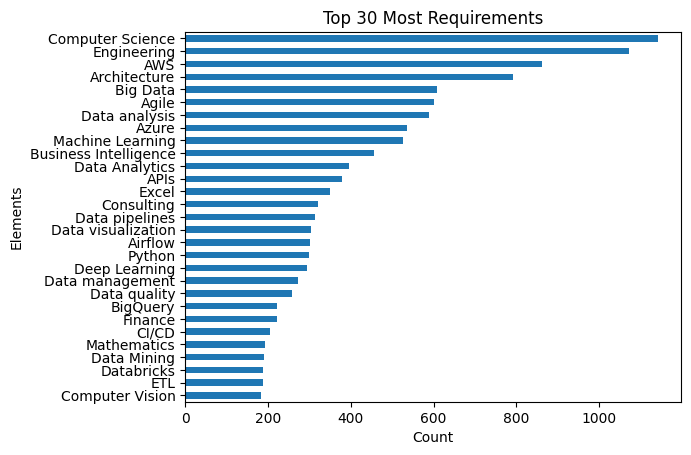

In [13]:
# Sort the top_elements in descending order
top_elements_sorted = top_elements.sort_values(ascending=True)

# Plot the column chart
top_elements_sorted.plot(kind='barh')

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Elements')
plt.title('Top 30 Most Requirements')

# Display the plot
plt.show()

## 4. Data Analyst Most Desired Skill

In [14]:
# Making it ready for the datavisualization tool

python = df[df['requirements'].str.contains('python', case=False)]

In [15]:
sql = df[df['requirements'].str.contains('sql', case=False)]

In [16]:
ex = df[df['requirements'].str.contains('Excel', case=False)]

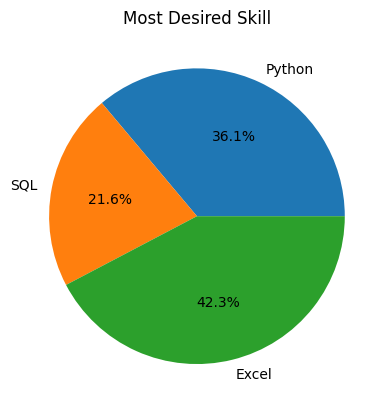

In [18]:
# Get the counts
python_count = len(python)
sql_count = len(sql)
excel_count = len(ex)

# Create a pie chart
labels = ['Python', 'SQL', 'Excel']
counts = [python_count, sql_count, excel_count]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Most Desired Skill')

plt.show()

## 5. Tableau VS Power BI

In [ ]:
tb = df[df['requirements'].str.contains('tableau', case=False)]

In [ ]:
pb = df[df['requirements'].str.contains('power bi', case=False)]

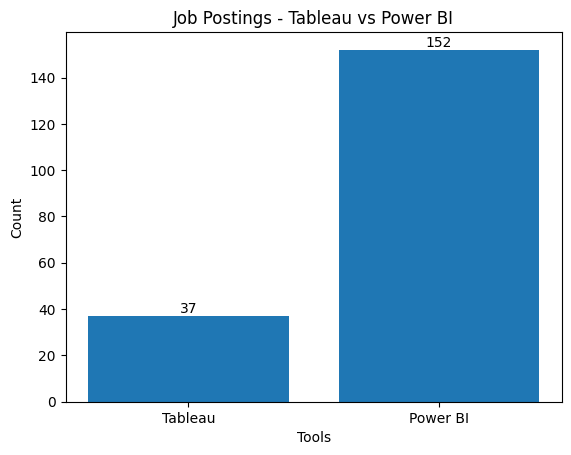

In [ ]:
# Get the counts
tableau_count = len(tb)
power_bi_count = len(pb)

# Create a bar plot
labels = ['Tableau', 'Power BI']
counts = [tableau_count, power_bi_count]

plt.bar(labels, counts)
plt.xlabel('Tools')
plt.ylabel('Count')
plt.title('Job Postings - Tableau vs Power BI')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## 6. IS THERE A CORRELATION BETWEEN SALARIES AND JOBS?

In [ ]:
df['salary'] = df['salary'].str.replace('K','000')

In [ ]:
df.dtypes

job_title           object
location            object
job_type            object
experience_level    object
salary              object
requirements        object
python              object
sql                 object
excel               object
tableau             object
power_bi            object
dtype: object

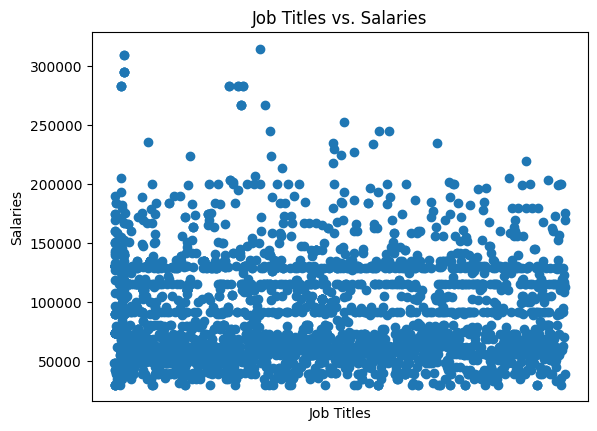

In [ ]:
# Convert 'salary' column to numeric, with errors='coerce'
df['salary'] = pd.to_numeric(df['salary'])

# Remove rows with non-numeric 'salary' values
df = df.dropna(subset=['salary'])

# Create scatter plot
plt.scatter(df['job_title'], df['salary'])

# Customize plot
plt.title('Job Titles vs. Salaries')
plt.xlabel('Job Titles')
plt.ylabel('Salaries')

# Remove X legend
plt.xticks([])

# Display the plot
plt.show()

## 7. DEMANDED LEVELS COMPARISON 

In [ ]:
# Create a new DataFrame with the count of experience levels
experience_counts = df['experience_level'].value_counts().reset_index()

# Rename the columns
experience_counts.columns = ['Experience Level', 'Count']

# Display the new DataFrame
experience_counts

,Experience Level,Count
0,Senior-level,1825
1,Mid-level,447
2,Entry-level,383
3,Executive-level,122


## 8. HIGHEST SALARY DATA JOBS AND HIGHEST DATA ANALYST SALARY

In [ ]:
# Group the DataFrame by 'job_title' and get the 10 highest salaries for each group
top_salaries = df.groupby('job_title')['salary'].nlargest(10).reset_index()

# Sort the DataFrame in descending order by salary
top_salaries = top_salaries.sort_values(by='salary', ascending=False)

# Display the resulting DataFrame
top_salaries.head(10)

,job_title,level_1,salary
2318,"Senior/Principal ML Engineer, Content Understa...",868,315000.0
1030,Data Scientist,789,310000.0
1031,Data Scientist,1422,310000.0
1032,Data Scientist,688,295000.0
1033,Data Scientist,785,295000.0
1035,Data Scientist,1412,295000.0
1034,Data Scientist,1371,295000.0
1723,Principal Deep Learning Engineer - Computer Vi...,1440,283000.0
723,Data Engineer,732,283000.0
724,Data Engineer,1443,283000.0


In [ ]:
# Filter the DataFrame for 'Data Analyst' job title
data_analyst_salaries = df[df['job_title'] == 'Data Analyst']

# Get the top 5 highest salaries for Data Analyst
top_data_analyst_salaries = data_analyst_salaries.nlargest(3, 'salary')[['job_title', 'salary']]

# Display the top 5 highest salaries for Data Analyst
top_data_analyst_salaries

,job_title,salary
799,Data Analyst,153000.0
2414,Data Analyst,142000.0
1888,Data Analyst,140000.0


## LAST ARRANGEMENTS FOR THE DATA VISUALIZATION TOOL 

In [ ]:
# Making it ready for the datavisualization tool

df['excel'] = df['requirements'].apply(lambda x: 'yes' if 'Excel' in x.lower() else 'no')

df['tableau'] = df['requirements'].apply(lambda x: 'yes' if 'tableau' in x.lower() else 'no')

df['power_bi'] = df['requirements'].apply(lambda x: 'yes' if 'power bi' in x.lower() else 'no')

df['sql'] = df['requirements'].apply(lambda x: 'yes' if 'sql' in x.lower() else 'no')

df['python'] = df['requirements'].apply(lambda x: 'yes' if 'python' in x.lower() else 'no')

In [ ]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['python'] == 'yes') &
                 (df['sql'] == 'yes') &
                 (df['excel'] == 'no') &
                 (df['power_bi'] == 'yes') &
                 (df['tableau'] == 'no')]

# Retrieve the job titles from the filtered DataFrame
job_titles_ = filtered_df['job_title']

# Display the resulting job titles
job_titles_

372     Especialista em Auditoria Interna - Data Analy...
1175               Data Analyst - Contract - 1 day a week
1249                                    Lead Data Analyst
1278                          Senior Vehicle Data Analyst
1467                         Ingéni Data / Power BI (H/F)
1892                         [RPG] Power BI Data Engineer
2051                               Power BI Data Engineer
2066                                   Power BI Developer
Name: job_title, dtype: object

In [ ]:
df

,job_title,location,job_type,experience_level,salary,requirements,python,sql,excel,tableau,power_bi
0,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",no,no,no,no,no
1,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",no,no,no,no,no
2,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...",no,no,no,no,no
3,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",no,no,no,no,yes
4,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...",no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
3193,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39000.0,"APIs,Clustering,Computer Science,Data visualiz...",no,no,no,no,no
3194,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92000.0,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL",no,yes,no,no,no
3195,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62000.0,"E-commerce,Engineering,Linux,Python,Robotics,S...",yes,no,no,no,no
3196,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39000.0,"Computer Science,Data Analytics,Data Mining,Ec...",no,no,no,no,no


## SAVING IT TO A NEW CSV FILE

In [19]:
df.to_csv('BigDataJobs.csv', index=False)
